# Introduction
This notebook deals with the Seattle AirBnb data set.
First I will explore the data, then see if I can get any interesting insights from the analysis. I might transform and join data.

## The data
The set of data is comprised by

- calendar data: This shows basically the bookings and the prices (dring the times a lising was available)
- listings data: It shows basically the master data of the AirBnb listings in Seattle with a huge number of attributes, ranging from the listing's location to policy attributes
- review data: It shows the reviews as such, the refernece to the listing that has been reviewd and the reviewer


## Business Questions
There are a number of interesting questions that can be answered from the data:

1. How do the prices differ during the course of the year? Are there any trends. Are there short term deviations? 
&rarr; Answering this question might help when planning a trip in advance 
2. Ar the there significant price differences between Seattle's neigborhoods? &rarr; Answering this question might help when investing in property or advertising certein areas for customers who are price sensitive
3. Are there reviewers / travellers who are more active that the average? &rarr; Adressing such reviewers directly might be a cost effective marketing tool.  


In [3]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline


### Calendar data inspection
Do some data exploration by looking at the columns and sample data from the calendar data file

In [4]:
# Read the calendar data set and explore it
df_calendar = pd.read_csv('./data/calendar.csv')
df_calendar.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [5]:
# how many columns and rows?
df_calendar.shape

(1393570, 4)

In [6]:
#number of unique listings
len(df_calendar['listing_id'].unique())

3818

In [7]:
#number of days in the data set
len(df_calendar['date'].unique())

365

In [8]:
print('min date: {}'.format(df_calendar['date'].unique().min()))
print('max date: {}'.format(df_calendar['date'].unique().max()))

min date: 2016-01-04
max date: 2017-01-02


### Interpretation of Calendar Data Set
The calendar data set shows the listings (identified by listing id), the date, the availability, and the price per day for each listing. 
It spans over a year 2016-01-04 until 2017-01-02 and shows the availability per listing during that year.

Do the prices fluctuate? Let us check a sample listing from the data set.

In [9]:
df_calendar[df_calendar['listing_id']==241032] 

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
360,241032,2016-12-29,t,$85.00
361,241032,2016-12-30,t,$85.00
362,241032,2016-12-31,t,$85.00
363,241032,2017-01-01,t,$85.00


### interpretation
This shows a listing with an (apparent) constant price throughout the year. Does it never change?

In [10]:
df_calendar[df_calendar['listing_id']==241032]['price'].dropna().unique()

array(['$85.00'], dtype=object)

Apparently for listing #241032 the price never changes throughout the year. Is this the case for all listings?

### Interesting question

- Are there listings with a high fluctuation? 
- Is there a time pattern?
- Can I show these pattern as a graph, for example a line chart?


## Checking the time trends
1. remove the null values and transform the dollar amounts from strings to float values for further processing
2. get the averages per day 
3. create a line chart or aggregate on week in a bar chart


In [12]:
#remove the null values and transform the dollar amounts from strings to float values for further processing
df_cal_wo_null = df_calendar.dropna()

convert_dollar = lambda val: float(val.replace('$','').replace(',', ''))
try:
    df_cal_wo_null['price_float'] = df_cal_wo_null['price'].apply(convert_dollar)
except:
    print('That broke...')

# group by date and get the mean values over all listings    
df_prepared = df_cal_wo_null.groupby('date')['price_float'].mean()
df_prepared_frame = df_prepared.to_frame()

C:\Users\q377338\AppData\Local\Temp\ipykernel_18752\1520394863.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_wo_null['price_float'] = df_cal_wo_null['price'].apply(convert_dollar)


In [13]:
# date is the index now after grouping
df_prepared_frame.index

Index(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
       '2016-01-09', '2016-01-10', '2016-01-11', '2016-01-12', '2016-01-13',
       ...
       '2016-12-24', '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28',
       '2016-12-29', '2016-12-30', '2016-12-31', '2017-01-01', '2017-01-02'],
      dtype='object', name='date', length=365)

## Presentation

Create a line chart with the date on the x-axis and the avarage price on the y-axis

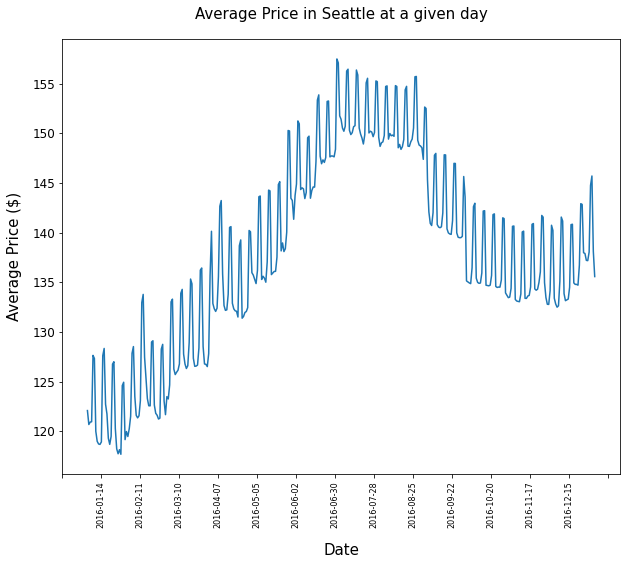

In [32]:
#create graph
#https://stackoverflow.com/questions/52834616/i-used-matplotlib-but-the-error-message-figure-size-720x576-with-0-axes-app


plt.rcParams["figure.figsize"] = (10,8)

fig, ax = plt.subplots()

plt.xlabel('Date', labelpad=15, fontsize=15)
plt.ylabel('Average Price ($)', labelpad=10, fontsize=15)
plt.title('Average Price in Seattle at a given day', pad=20, fontsize=15);
plt.xticks(fontsize = 8)
plt.xticks(rotation = 90)
plt.yticks(fontsize = 12)

ax.plot(df_prepared_frame.index, df_prepared_frame['price_float'])
startx, endx = ax.get_xlim()

# omit some dates such that the data remains readable
ax.set_xticks(np.arange(startx, endx, 28))

# save the graph as a file
plt.savefig('price_per_day.png', bbox_inches = 'tight');

## Interpretation

There seems to be great deviations within short periods of time. These are week and weekend days. Thi is a first insight, but we are more interested in seeing a general trend.

## What to do next?

In order to get a smoother line that represents more general trends, we do the following:

- create a rolling average 
- week 1 - 52
- average of all values for the 7 surrounding days

We will have in total 6 null values out of the 365 days as we cannot look any further into the past or the future. 6 out of 365 is acceptable for our analysis.

In [15]:
# compute the rolling average price. We will have in total 6 null values out of the 365 days as we cannot look any further into the past or the future

df_prepared_frame['rav'] = df_prepared_frame['price_float'].rolling(7, center = True).mean()
df_prepared_frame

,price_float,rav
date,,
2016-01-04,122.085879,NaN
2016-01-05,120.681307,NaN
2016-01-06,120.928258,NaN
2016-01-07,120.958896,122.804001
2016-01-08,127.640853,122.361581
...,...,...
2016-12-29,138.045503,139.840880
2016-12-30,144.738380,139.509018
2016-12-31,145.698146,NaN


## Presentation

Now create a new line chart that will be much smoother and much more helpful to analyze the data

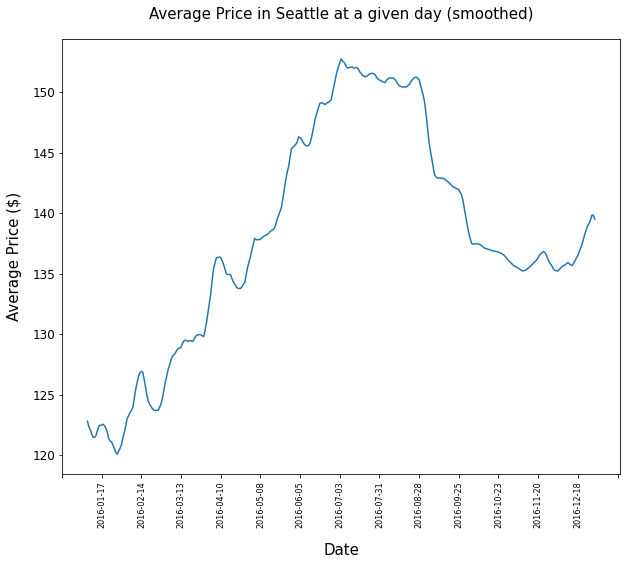

In [17]:
plt.rcParams["figure.figsize"] = (10,8)

fig, ax = plt.subplots()

plt.xlabel('Date', labelpad=15, fontsize=15)
plt.ylabel('Average Price ($)', labelpad=10, fontsize=15)
plt.title('Average Price in Seattle at a given day (smoothed)', pad=20, fontsize=15);
plt.xticks(fontsize = 8);
plt.xticks(rotation = 90)
plt.yticks(fontsize = 12);

ax.plot(df_prepared_frame.index, df_prepared_frame['rav'])
startx, endx = ax.get_xlim()

ax.set_xticks(np.arange(startx, endx, 28))

plt.savefig('rolling_price_per_day.png', bbox_inches = 'tight');

## Conclusions

- Generally prices deviate throuout the year.
- Prices start to increase in spring and reach climax in the summer months. They will drop in the fall and will increase in the end of the year.
- Generally Seattle prices seem to have become higher during 2016.

# Listings data inspection

We now inspect the listings data set.

In [19]:
# Read the listings data set
df_listings = pd.read_csv('./data/listings.csv')

df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [20]:
#show all attributes, i.e. column names
list(df_listings.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


## Interpretation of Listings Data Set

This is the master data of the listings in Seattle. A record, i.e. a row contains all the master data that describe a listing. From the business questions at the top, the neighborhood seems to be an interesting attribute to evaluate.

### Interesting questions

- Which neighborhood yields the highest / lowest prices? A nice bar chart would be good for the interpretation.
- Any other interesting combination, such as review_scores rating could be treated in a similar fashion.

### How to achieve this?

- Create a mean / average price per listing from the calendar data set. Remove null values for booked days
- Join the mean / average to the listing
- Evaluate the new data set with the neighborhoods in focus.
- The specific attribute "neighbourhood_group_cleansed" seems to be the most suitable one.

In [33]:
df_listings['neighbourhood_group_cleansed'].value_counts()


Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

## Data processing 

Like before, create a matrix with the average price per listing.
Then create a map (listing_id &rarr; mean price) for further processing 

In [22]:
# create a map from the bookings per listing id
# key: listing_id, value: list of prices OR 
# 1. remove null values
# df_prepared_frame contains these values already

df_cal_wo_null = df_calendar.dropna()

convert_dollar = lambda val: float(val.replace('$','').replace(',', ''))

try:
    df_cal_wo_null['price_float'] = df_cal_wo_null['price'].apply(convert_dollar)
except:
    print('That broke...')
 
ds_prepared = df_cal_wo_null.groupby('listing_id')['price_float'].mean()
listings_dict = ds_prepared.to_dict()

C:\Users\q377338\AppData\Local\Temp\ipykernel_18752\412727416.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_wo_null['price_float'] = df_cal_wo_null['price'].apply(convert_dollar)


## processing continued

add the mean price to the listing and group by the neighborhood such that a new matrix neighborhood &rarr; mean price per neighborhood is created

In [23]:
# use a lambda to retrieve the price for a listing
add_mean_price = lambda val: listings_dict.get(val, 0)

try:
    df_listings['mean_price'] = df_listings['id'].apply(add_mean_price)
except:
    print('That broke...')
    
df_listings[['id', 'mean_price', 'neighbourhood_group_cleansed']]
df_neighorhood_byprice = df_listings[['id', 'mean_price', 'neighbourhood_group_cleansed']].groupby('neighbourhood_group_cleansed').mean()

df_neighorhood_byprice

,id,mean_price
neighbourhood_group_cleansed,,
Ballard,5.180190e+06,125.754773
Beacon Hill,5.052427e+06,96.049718
Capitol Hill,5.668931e+06,130.551388
Cascade,6.089536e+06,141.214094
Central Area,5.587679e+06,128.700344
Delridge,5.217371e+06,84.470426
Downtown,5.683918e+06,173.640287
Interbay,5.872783e+06,117.308887
Lake City,5.432238e+06,93.779962


## Presentation
Create a bar chart showing the values per neighborhood.
Each bar will get the specific values attached for more specific information.

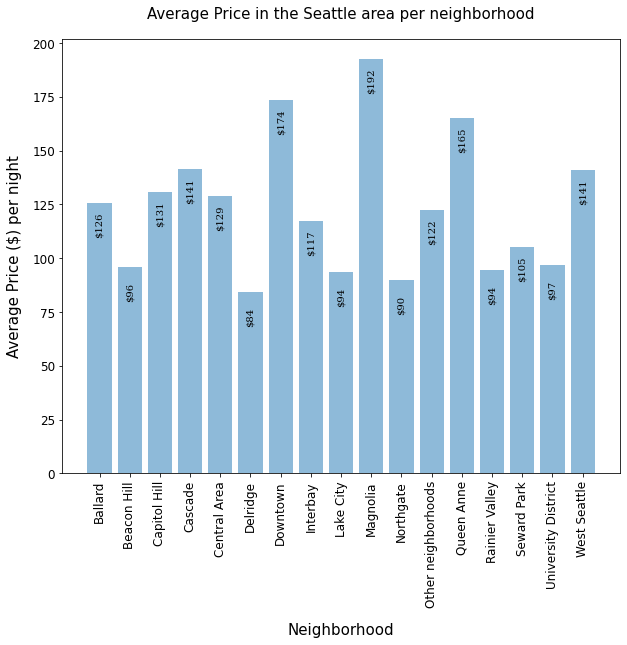

In [24]:
plt.rcParams["figure.figsize"] = (10,8)

plt.xlabel('Neighborhood', labelpad=15, fontsize=15)
plt.ylabel('Average Price ($) per night', labelpad=10, fontsize=15)
plt.title('Average Price in the Seattle area per neighborhood', pad=20, fontsize=15);
plt.xticks(fontsize = 12);
plt.xticks(rotation = 90)
plt.yticks(fontsize = 12);

y_pos = np.arange(len(df_neighorhood_byprice))

plt.bar(y_pos, df_neighorhood_byprice['mean_price'], align='center', alpha=0.5)
plt.xticks(y_pos, df_neighorhood_byprice.index)

locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    
    price = df_neighorhood_byprice.loc[label.get_text()]['mean_price']
    plt.text(loc,price - 15,'${:0.0f}'.format(price),ha='center',
                 color = 'k',fontweight='normal',fontfamily='serif', rotation=90)
    
plt.savefig('neighborhood_price.png', bbox_inches = 'tight');

# Conclusions
Prices very quite a bit between neighborhoods in the Seattle area.

While in Delridge the everage listing is \\$84, for a night inMagnolia \\$192 on average have to be paid.

Realistically, the data should be further broken down to compare similar offerings.

# The Reviews Data Set

The reviews data set shows the reviews per user (i.e. reviewer) and listing in the given timeframe.

In [25]:
# Read the reviews data set
df_reviews = pd.read_csv('./data/reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [26]:
#show all attributes, i.e. column names
list(df_reviews.columns)

['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments']

In [27]:
df_reviews.groupby(by='reviewer_id').count()

,listing_id,id,date,reviewer_name,comments
reviewer_id,,,,,
15,1,1,1,1,1
262,1,1,1,1,1
431,1,1,1,1,1
1618,1,1,1,1,1
1720,1,1,1,1,1
...,...,...,...,...,...
52713564,1,1,1,1,1
52721080,1,1,1,1,1
52723379,1,1,1,1,1


## Interesting questions

Is there a significant amount of guests who keep returning to the Seattle area many times a year? These guests could be interesting for marketing activities as they might have a positive impact on prospective AirBnb customers with positive reviews.

### Processing

1. Group the reviews by reviewer
2. Count the groups, i.e. create buckets per written review
3. Show the amount of users per bucket, e.g. 20 people wrote just one review, 10 people wrote 2 reviews, 5 people wrote 3 reviews etc 

In [29]:
df_counts = (df_reviews.groupby(by='reviewer_id').count()).copy()
df_counts.rename(columns={'id': 'review_count'},inplace=True)

df_subset = df_counts[df_counts['listing_id'] >0] [['review_count']].copy()
df_visitor_count = df_subset.groupby(by='review_count')['review_count'].count()

df_visitor_count_frame = df_visitor_count.to_frame()

#useful? https://www.marsja.se/pandas-count-occurrences-in-column-unique-values/
#https://stackoverflow.com/questions/50824493/pandas-groupby-filter-on-count

df_visitor_count_frame

,review_count
review_count,
1,69381
2,4933
3,877
4,269
5,110
6,66
7,36
8,13
9,14


### Further processing

use the amount of all reviews to get the percentage, not just a count

In [30]:
sum_val = df_visitor_count_frame.sum()['review_count']
sum_val

75730

## Presentation

We create a bar chart to show the buckets (users having written a certain amount of reviews). 

- The x axis shows the buckets, i.e. the amounts of reviews a reviewer has created
- The y axis shows the number of reviewer in that category
- Each bar shows the percentage 

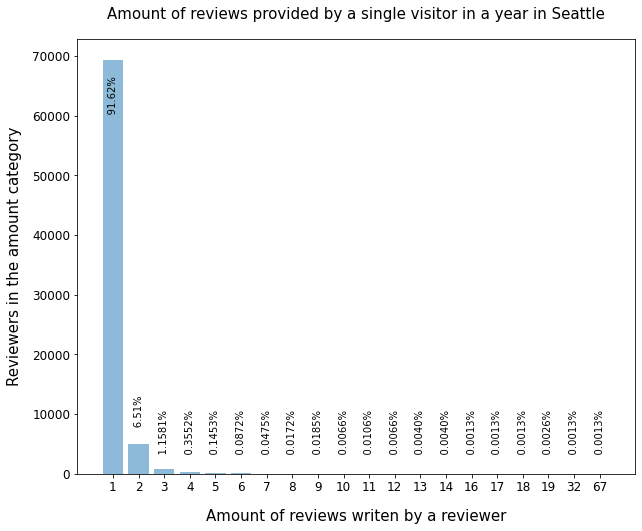

In [36]:
fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = (10,8)

plt.xlabel('Amount of reviews writen by a reviewer', labelpad=15, fontsize=15)
plt.ylabel('Reviewers in the amount category', labelpad=10, fontsize=15)
plt.title('Amount of reviews provided by a single visitor in a year in Seattle', pad=20, fontsize=15);
plt.xticks(fontsize = 12)
plt.xticks(rotation = 0)
plt.yticks(fontsize = 12)

y_pos = np.arange(len( df_visitor_count_frame))

plt.bar(y_pos, df_visitor_count_frame['review_count'], align='center', alpha=0.5)

plt.xticks(y_pos, df_visitor_count_frame.index)
#ax.set_yscale('log')

#show percentages
locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    
    percentage = ((df_visitor_count_frame.loc[int(label.get_text())]['review_count']) / sum_val) * 100
        
    if percentage > 20:
        plt.text(loc, 58000,'{:10.2f}%'.format(percentage),ha='center',
                 color = 'k',fontweight='normal',fontfamily='sans', rotation=90)
    else:
        if percentage > 5:
            plt.text(loc, 5000,'{:10.2f}%'.format(percentage),ha='center',
                 color = 'k',fontweight='normal',fontfamily='sans', rotation=90) 
        else:
            plt.text(loc, 1500,'{:10.4f}%'.format(percentage),ha='center',
                color = 'k',fontweight='normal',fontfamily='sans', rotation=90)


plt.savefig('review_counts.png', bbox_inches = 'tight');

# Conclusion

The overwhelming amount of visitors write only one review in a year (91,62%) with the number for two or three reviews per year being low already (6.51% and 1.15%). Only very few people write a high amount of reviews (in total less than 1%).

Targetting these users with specific marketing measures doesn't seem to make much sense.